In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [3]:
driver_df = pd.read_csv("go_track_tracks.csv")
driver_df.head()

id  id_android      speed      time  distance  rating  rating_bus  \
0   1           0  19.210586  0.138049     2.652       3           0   
1   2           0  30.848229  0.171485     5.290       3           0   
2   3           1  13.560101  0.067699     0.918       3           0   
3   4           1  19.766679  0.389544     7.700       3           0   
4   8           0  25.807401  0.154801     3.995       2           0   

   rating_weather  car_or_bus linha  
0               0           1   NaN  
1               0           1   NaN  
2               0           2   NaN  
3               0           2   NaN  
4               0           1   NaN

In [4]:
print('Number of colums in Dataframe : ', len(driver_df.columns))
print('Number of rows in Dataframe : ', len(driver_df.index))

Number of colums in Dataframe :  10
Number of rows in Dataframe :  163


In [5]:
driver = driver_df.drop(["id","id_android","linha", "car_or_bus","rating_weather", "rating_bus","rating","time"], axis = 1)
driver.head()

speed  distance
0  19.210586     2.652
1  30.848229     5.290
2  13.560101     0.918
3  19.766679     7.700
4  25.807401     3.995

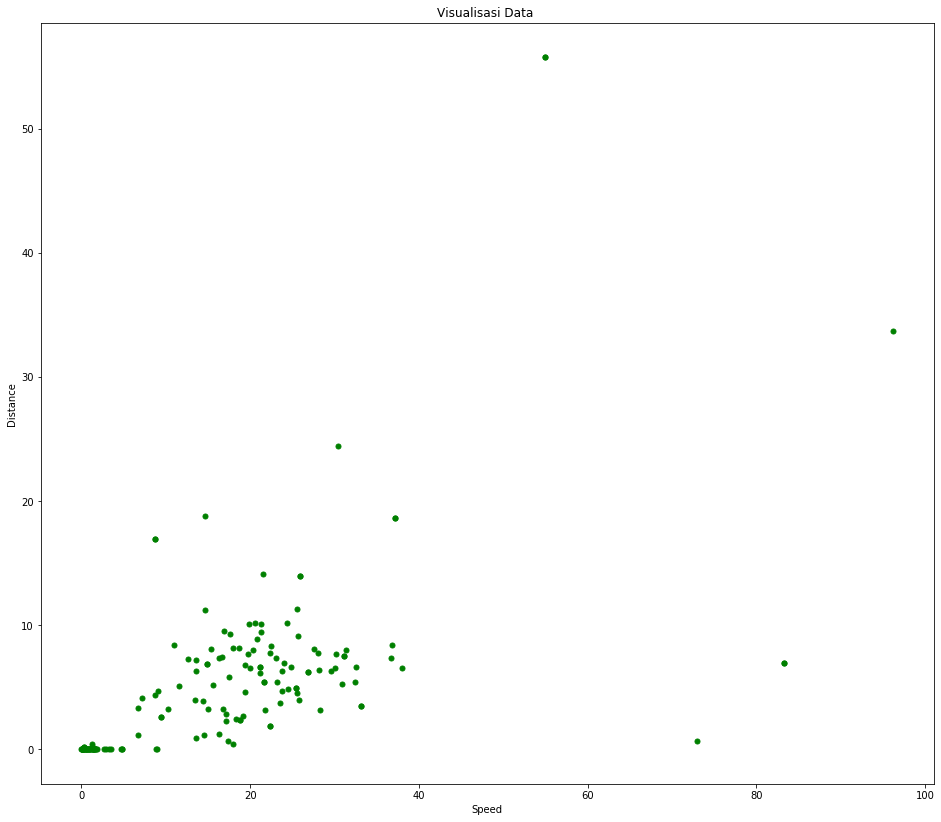

In [6]:
plt.figure(figsize=(16,14))
plt.scatter(driver.speed, driver.distance, c='green', s=100, alpha=1 , marker=".");
plt.title("Visualisasi Data ")
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

In [7]:
X = driver.values
X = np.nan_to_num(X)

In [8]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

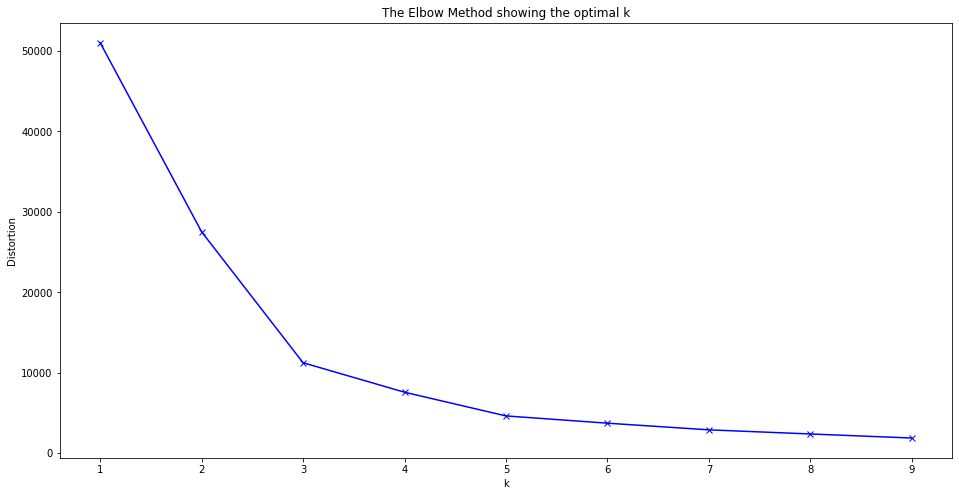

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [11]:
driver["Clus_km"] = labels
driver.head(5)

speed  distance  Clus_km
0  19.210586     2.652        0
1  30.848229     5.290        0
2  13.560101     0.918        1
3  19.766679     7.700        0
4  25.807401     3.995        0

In [12]:
driver.groupby('Clus_km').mean()

speed   distance
Clus_km                      
0        22.829721   6.902967
1         3.024042   1.155015
2        74.296825  26.648667

Text(0, 0.5, 'distance')

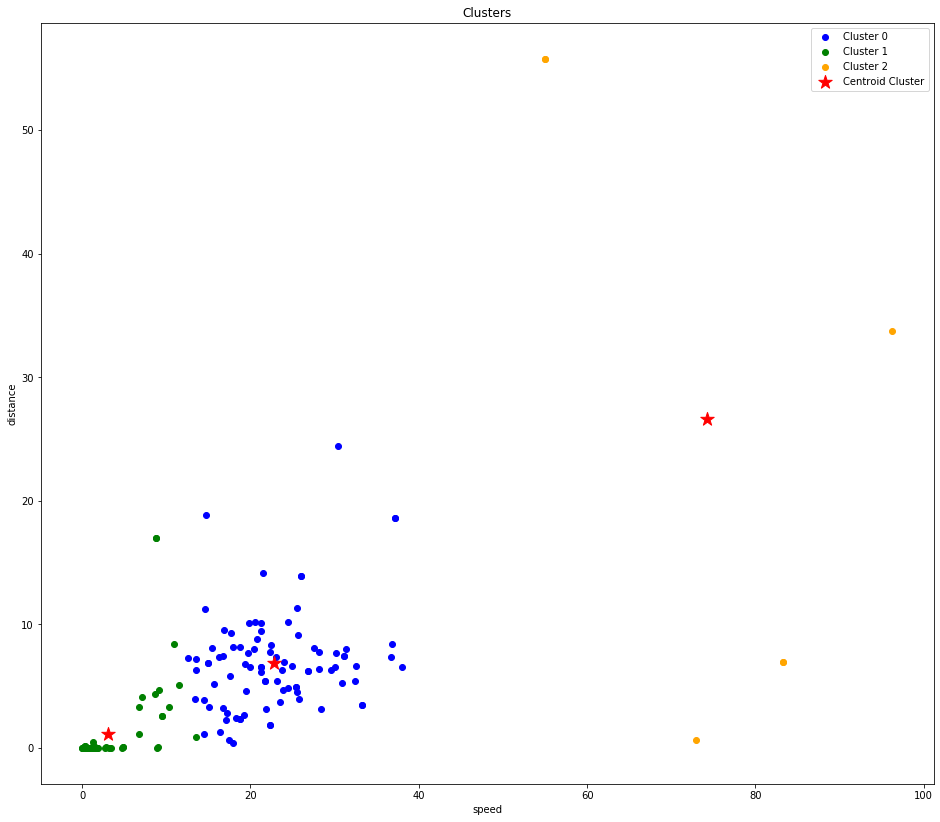

In [13]:
n_clusters = max(labels)+1
colors = ["blue", "green", "orange"]
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = driver[driver.Clus_km == label]
    plt.scatter(subset.speed, subset.distance, c=color, label='Cluster '+str(label),alpha=1)

centers = k_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , label='Centroid Cluster', marker="*");
plt.legend()
plt.title('Clusters')
plt.xlabel('speed')
plt.ylabel('distance')

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X, k_means.fit_predict(X))
score

0.6197965321221998

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7733438225565842
For n_clusters = 3 The average silhouette_score is : 0.6197965321221998
For n_clusters = 4 The average silhouette_score is : 0.6325333508237407
For n_clusters = 5 The average silhouette_score is : 0.5601657594387155
For n_clusters = 6 The average silhouette_score is : 0.529855083818479
For n_clusters = 7 The average silhouette_score is : 0.5271585435973477
For n_clusters = 8 The average silhouette_score is : 0.5369749429879105


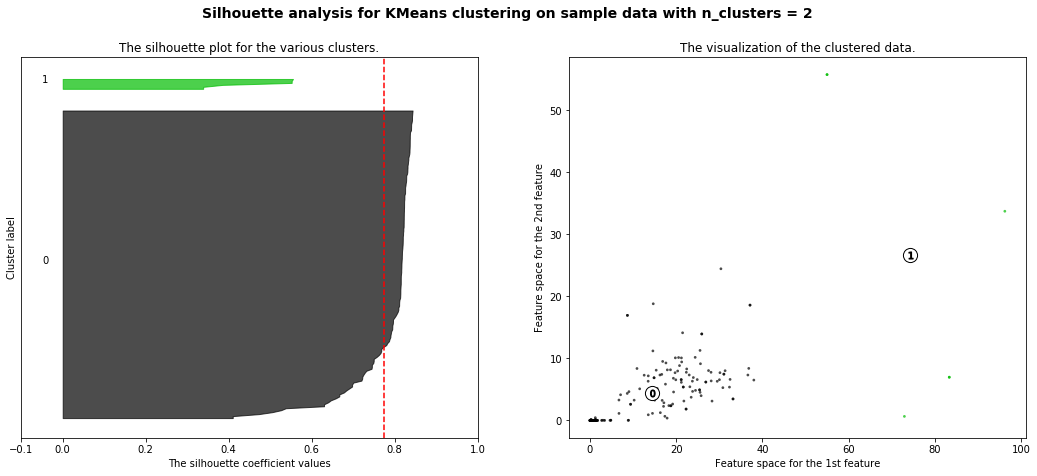

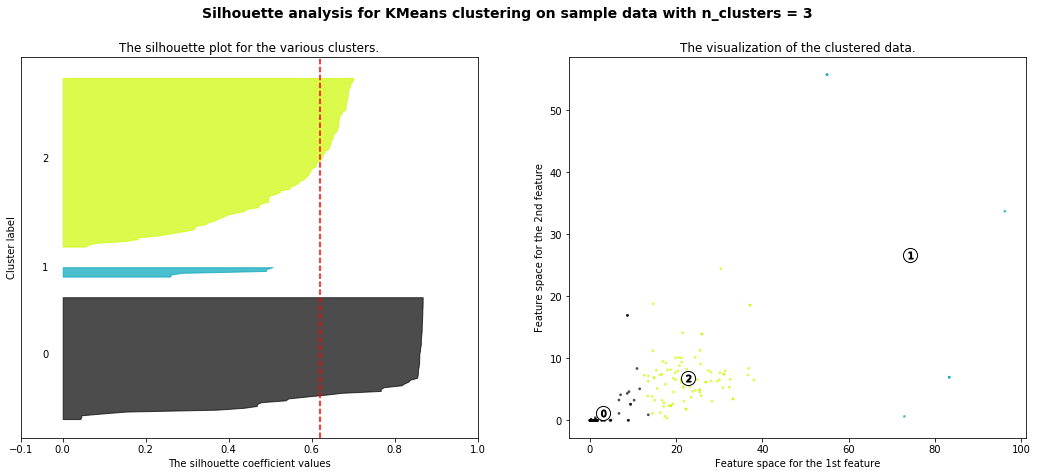

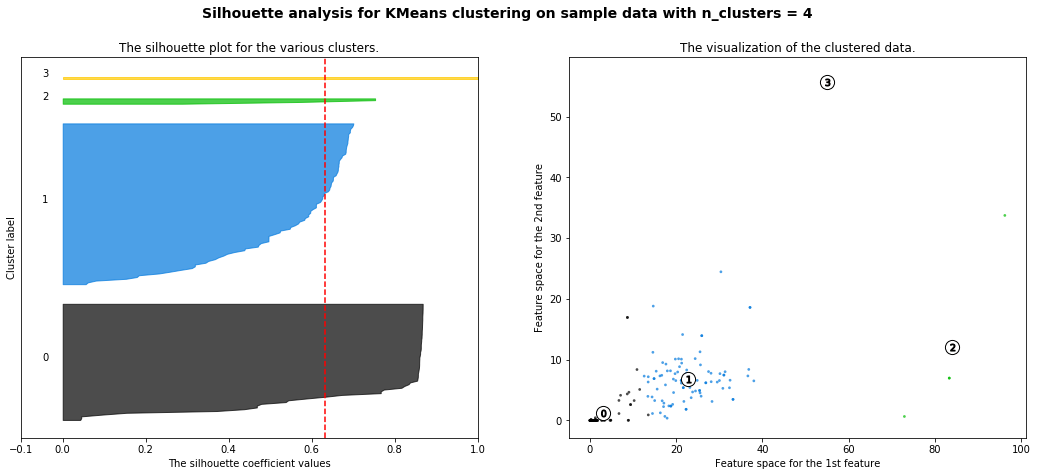

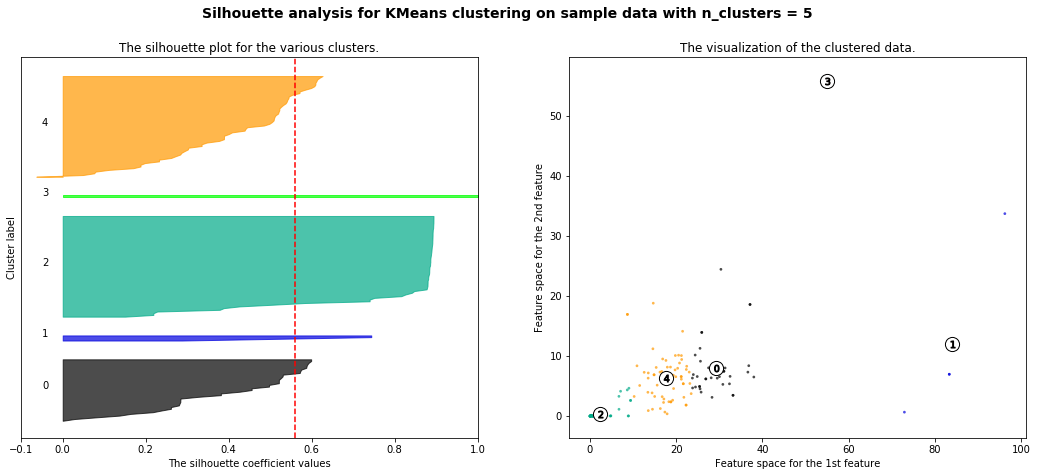

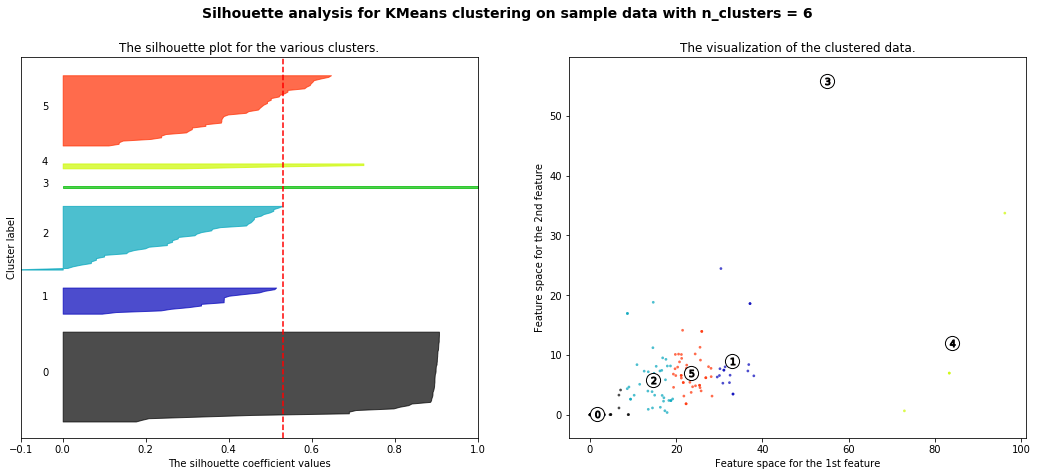

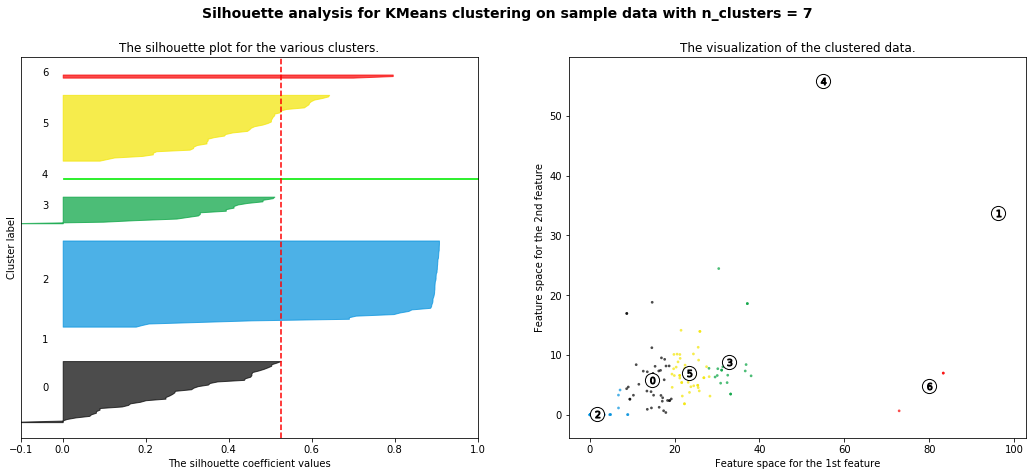

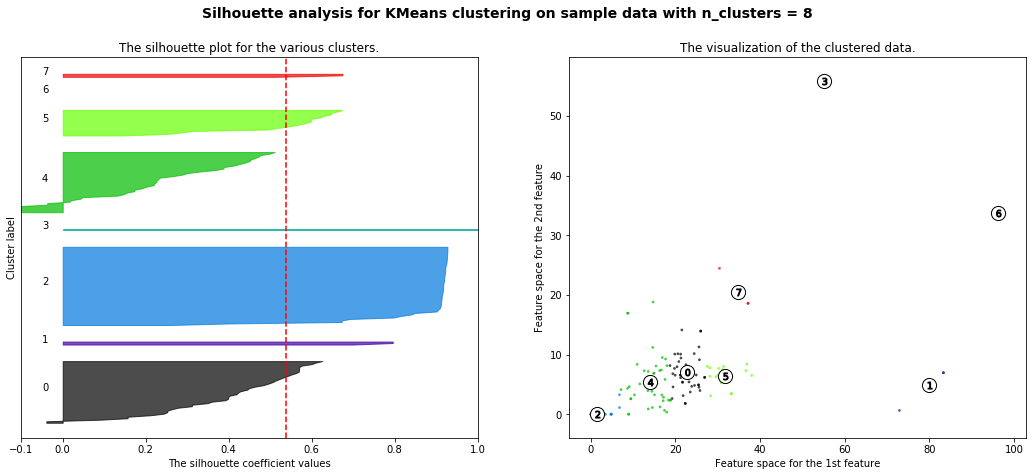

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()